In [ ]:
#hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

# igwp - Improved Global Warming Potential (IGWP)


> A Global Warming Potential model with improved support for short-lived climate pollutions (SLCPs).

## Why an improved version

The Global Warming Potential (GWP) is a commonly used, simple model
to "normalize" the warming impact of different climate pollutants to 
$CO_2$ equivalents. This approach works well for long-lived climate 
pollutants (LLCPs) but fails for short-lived climate pollutants (SLCPs).
The improved version IGWP accounts much better for impacts of SLCPs.

## Scientific background

This project:

* is based on the findings in this paper: 
  Cain, M., Lynch, J., Allen, M.R., Fuglestedt, D.J. & Macey, A.H. (2019).
  Improved calculation of warming- equivalent emissions for short-lived 
  climate pollutants. npj Climate and Atmospheric Science. 2(29). 
  Retrieved from https://www.nature.com/articles/s41612-019-0086-4

* inspired by: 
  https://gitlab.ouce.ox.ac.uk/OMP_climate_pollutants/co2-warming-equivalence/

* and uses the simple emissions-based impulse response and carbon cycle 
  model FaIR: https://github.com/OMS-NetZero/FAIR
  
### The maths

$$IGWP = GWP_H * (r * \frac{\Delta E_{SLCP}}{\Delta t} * H + s * E_{SLCP})$$

with:

* $IGWP$ - Improved Global Warming Potential
* $GWP_H$ - Global Warming Potential for period $H$ (e.g. $GWP_{100}$ for 100 years)
* $H$ time-horizon (commonly 100 years)
* $r$ - flow term faction, found to be 0.75 with linear regression
* $s$ - stock term fraction, found to be 0.25 with linear regression, condition: $r + s = 1$ 
* $\Delta E_{SLCP}$ - change of rate of short-lived climate pollutant
* ${\Delta t}$ - time difference for $\Delta E_{SLCP}$, typical value: 20 years
* $E_{SLCP}$ emission short-lived climate pollutant for investigated year

## Install

With `pip`:

    pip install igwp
    
With `conda`:

    conda instal -c hydrocomputing igwp

## Plot all results

This plots shows the differences between GWP, GWP*, and IGWP.

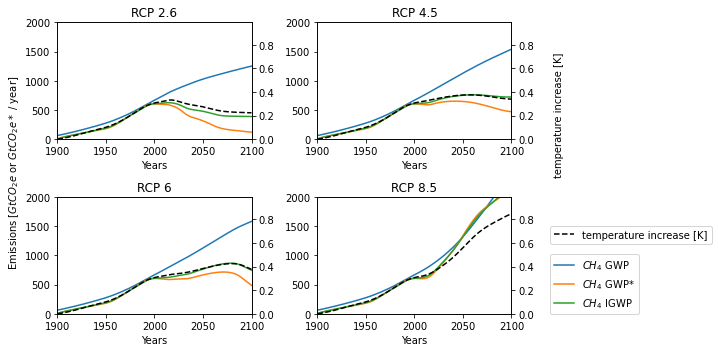

In [ ]:
from igwp.core import get_emission_data_paths, make_gwps_improved
from igwp.plotting import plot_all

rcp_scenarios = get_emission_data_paths()

plot_all(rcp_scenarios, make_df=make_gwps_improved)

This plot reproduces the Fig.1 in the paper descriobung IGWP (although with this name, https://www.nature.com/articles/s41612-019-0086-4).

## Show some values

The results for the emissions based on GWP, GWP*, and IGWP for scenario RCP 2.6 for the years 2000 through 2020:

In [ ]:
from igwp.core import make_gwps_improved

paths = get_emission_data_paths()

df26 = make_gwps_improved(file_name=paths['RCP 2.6'])
df26.loc[2000:2020]

,$CH_4$ GWP,$CH_4$ GWP*,$CH_4$ IGWP
Years,,,
2000,8.405793,-0.896435,1.429122
2001,8.495458,-0.924463,1.430517
2002,8.584206,-0.957068,1.428251
2003,8.672059,-0.994154,1.422399
2004,8.759072,-1.035440,1.413188
2005,8.845276,-1.080772,1.400740
2006,8.961719,-0.974904,1.509252
2007,9.077956,-0.870071,1.616936
2008,9.193784,-0.767278,1.722987


## Add emissions for some years and see effects

Let's assume very strong increases of $CH_4$ emissions for the years 2005 through 2007 and see what impact ths has on the three different models. (Units of additional emssions are Gt $CH_4$ / yr).

In [ ]:
import pandas as pd 

additional_emssions = pd.Series([0.1, 0.5, 0.2], index=[2005, 2006, 2007])
additional_emssions.name = 'CH_4 [Gt/yr]'
additional_emssions.index.name = 'Year'
additional_emssions

Year
2005    0.1
2006    0.5
2007    0.2
Name: CH_4 [Gt/yr], dtype: float64

In [ ]:
df26 = make_gwps_improved(file_name=paths['RCP 2.6'], additional_emssions=additional_emssions)
df26.loc[2000:2010]

,$CH_4$ GWP,$CH_4$ GWP*,$CH_4$ IGWP
Years,,,
2000,8.405793,-0.896435,1.429122
2001,8.495458,-0.924463,1.430517
2002,8.584206,-0.957068,1.428251
2003,8.672059,-0.994154,1.422399
2004,8.759072,-1.035440,1.413188
2005,11.645276,12.919228,12.600740
2006,22.961719,69.025096,57.509252
2007,14.677956,27.129929,24.016936
2008,9.193784,-0.767278,1.722987


Notice the different impacts of this $CH_4$ "flush" on these GWP models.